### 회귀알고리즘과 모델 규제

지도학습의 알고리즘은 크게 분류와 회귀로 나뉨

분류 : 샘플을 몇개의 클래스 중 하나로 분류하는 문제

회귀 : 분류하는것이 아닌 임의의 어떤 숫자를 예측하는 문제(두 변수사이의 상관관계를 분석하는 방법)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

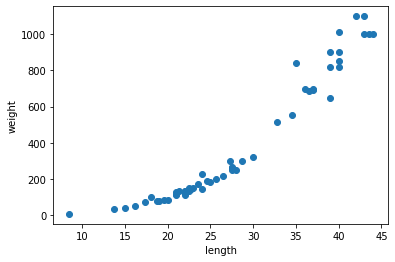

In [2]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
#reshape 을 사용하여 배열의 크기를 수정 할 수 있음

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_input.shape, test_input.shape

((42, 1), (14, 1))

In [5]:
from sklearn.neighbors import KNeighborsRegressor


knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

분류의 경우 샘플을 정확하게 분류한 개수의 비율을 뜻하지만 회귀에서는 결정계수로 평가하며 R2라고도 부른다.

R2 = 1 - (타겟 - 예측)^2의 합 / (타겟 - 평균)^2의 합

예측이 타깃과 가까워지면 1에 가까워짐

In [6]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환함

In [7]:
#훈련한 모델을 사용하여 R2점수 확인
knr.score(train_input, train_target)

0.9698823289099254

훈련 세트에서 평가가 좋았지만 테스트 세트에서 점수가 안좋으면 과대적합이 되었다고 볼 수 있음 반대로 훈련세트보다 테스트 세트의 점수가 높거나 두개 모두 낮은경우 과소적합이 되었다고 볼 수있다. 즉 모델이 너무 단순하여 훈련이 적절하게 되지 않았다고 볼 수 있음

즉 여기서는 과소적합이 되었다고 볼 수 있음

In [8]:
# 과소적합을 해결하기위 해 K의 값을 3으로 줄여서 사용
knr.n_neighbors = 3
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [9]:
knr.score(test_input, test_target)

0.9746459963987609

### 3-2장

In [10]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [11]:
knr.predict([[50]])

array([1033.33333333])

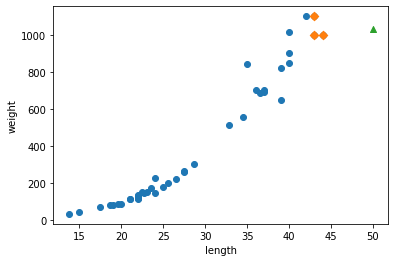

In [12]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
np.mean(train_target[indexes])

1033.3333333333333

In [14]:
knr.predict([[100]])

array([1033.33333333])

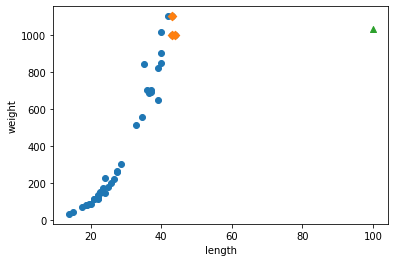

In [15]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

선형회귀 : 특성과 타겟 사이의 관계를 잘 나타내는 선형 방정식을 찾는 방법

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
lr.predict([[50]])

array([1241.83860323])

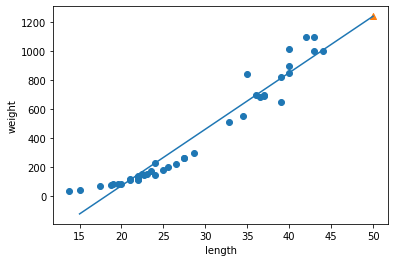

In [17]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


### 다항 회귀

In [19]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [20]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [21]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [22]:
# 무게 = 1.01 x 길이^2 -21.6 x 길이 +116.05
# coef_ :  기울기 intercept_:  절편
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278304


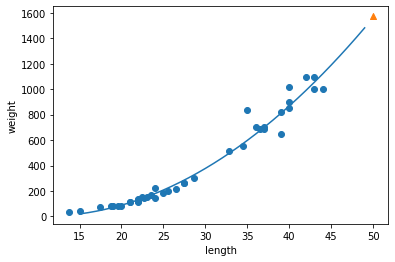

In [23]:
point = np.arange(15, 50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


### 3-3 특성공학과 규제

특성 공학 : 기존의 특성을 사용해 새로운 틍성을 뽑는 작업

In [25]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [26]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [27]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [29]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [30]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

train_poly.shape

(42, 9)

In [31]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [32]:
test_poly = poly.transform(test_input)

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9903183436982124

In [34]:
lr.score(test_poly, test_target)

0.9714559911594203

In [35]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [36]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999979449

In [37]:
lr.score(test_poly, test_target)

-144.40226186334812

In [38]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

###  릿지 : 선형 모델의 계수를 작게 만들어 과대적합을 완화시킴

In [39]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [40]:
print(ridge.score(test_scaled, test_target))

0.9790693977615401


In [41]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

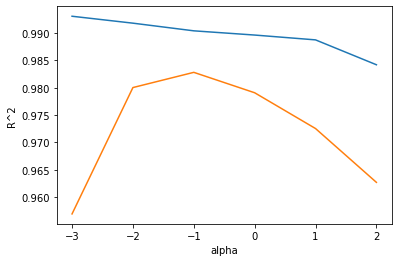

In [42]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [43]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386894


### 리쏘: 규제가 있는 선형 회귀 모델로 릿지와 달리 수 값을 0으로 만들수 있음

In [44]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [45]:
print(lasso.score(test_scaled, test_target))

0.9800593698421886


In [46]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\keoungchan\anaconda3\envs\ADFA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.69795779601, tolerance: 518.2793833333334
  positive)
C:\Users\keoungchan\anaconda3\envs\ADFA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345409666, tolerance: 518.2793833333334
  positive)


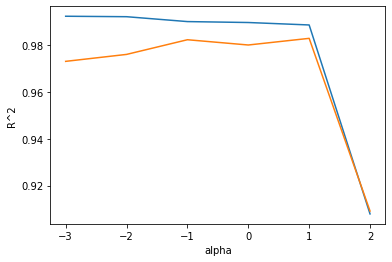

In [47]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [48]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
print(np.sum(lasso.coef_ == 0))

0.9888067471131867
0.9824470598706695
40


1. 상관관계 : 상관관ㄱ

2. 모델 평가 방법

 2.1 confusion matrix(오차행렬) : 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표
 
 2.2 Accuracy(정확도) : 전체 데이터 중 올바르게 예측한 비율
 
 2.3 Recall(재현율) : 실제 true중 예측된 true의 비율
 
 2.4 precison(정밀도) : 예측한 True중 실제 Ture의 비율
 
 2.5 F1-score : 재현율과 정밀도의 조화 평균을 나타냄

3. 데이터 정규화 하는 방법

4. bias와 variance trade of 과대적합과 과소적합과의 관계

Bias(편향) : 지나치게 단순한 모델로 인한 error 편향이 크면 과소적합이 되었다는 뜻
 
Variance(분산) : 지나치게 복잡한 모델로 인한 error 분산이 크면 과대적합이 되었다는 뜻

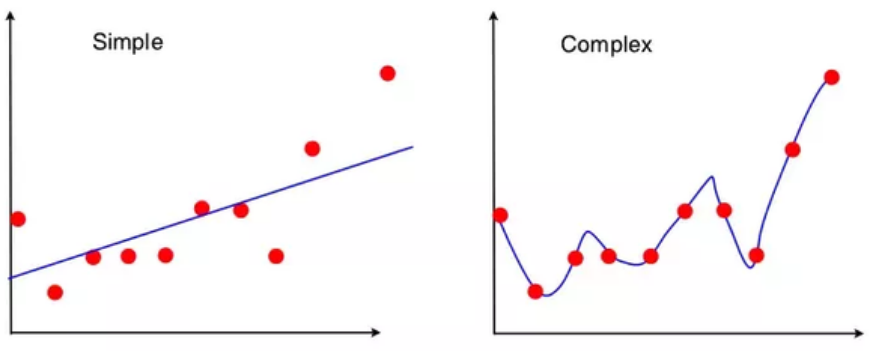


왼쪽그림은 high bias , low variance 오른쪽은 low bias high variance를 나타냄 

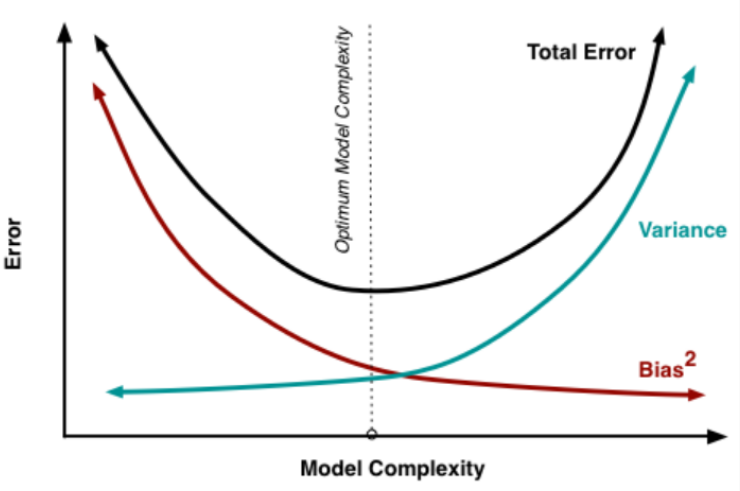

모델이 복잡해질 수록 편향은 작아지고, 분산은 커지게되면서 over-fitting 이됨 모델이 단순해질수록 편향은 커지고 분산은 작아지면서 under-fitting 됨 

오류를 최소화하려면 편향과 분산의 합이 최소가 되는 적당한 지점을 찾아야 합니다. 